<a href="https://colab.research.google.com/github/Mashi007/Sales/blob/Documentos/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **1. Marco de datos**

---

In [2]:
import pandas as pd

# Importar el archivo CSV
df_sales = pd.read_csv("/content/sales_predictions.csv")

# Imprime las primeras filas del DataFrame
df_sales.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---
# **2. Análisis de calidad**

---


**Estructura de la matriz**: Análisis de filas y columnas

In [3]:
df_sales.shape


(8523, 12)

**Análisis de duplicados**: No existe duplicados

In [21]:

# Identificar los duplicados
duplicates = df_sales[df_sales.duplicated()]

# Imprimir los registros duplicados
print("Registros duplicados:")
print(duplicates)





Registros duplicados:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


**Análisis si las columanas corresponde al tipo de información que corresponden (numero u objeto)**: Todas las variables corresponden a la naturaleza requerida, es decir, son numeros u objetos de manera correspondiente. Sin embargo, es necesario analizar las variables Item_Weight (7060 datos) y Outlet_Size (6113 datos), porque no tienen el total posible de referencias, dado que el total de la matriz es 8523









In [81]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Completar celdas vacias columan Item_Weight**: Segun la columna Item_Identifier, se puede llenar las celdas vacias ya que los ID de cada producto tiene un peso comun que puede ser usado                

In [83]:

# Cargar los datos en un DataFrame
df_sales = pd.read_csv("sales_predictions.csv")

# Calcular la media de "Item_Weight" para cada valor único de "Item_Identifier"
item_weight_mean = df_sales.groupby("Item_Identifier")["Item_Weight"].mean()

# Iterar sobre el DataFrame y reemplazar los valores nulos en la columna "Item_Weight"
for idx, row in df_sales.iterrows():
    if pd.isnull(row["Item_Weight"]):
        df_sales.at[idx, "Item_Weight"] = item_weight_mean[row["Item_Identifier"]]

# Mostrar el DataFrame actualizado
print(df_sales.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

**Commprobación de celdas null en columna Item_Weight**: despues de aplicar criterio se comprueba que hay 4 filas con ID de producto que no cuentan con patron de peso extrapolable. Por lo que al ser 4 filas se elimina 

In [84]:
# Comprobación de celdas null
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [85]:
# Identificación de casos
null_values = df_sales["Item_Weight"].isnull()
print(null_values)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool


In [86]:
# Eliminación de 4 filas

# Cargar los datos en un DataFrame
df_sales = pd.read_csv("sales_predictions.csv")

# Eliminar las filas con valores nulos en la columna "Item_Weight"
df_sales = df_sales.dropna(subset=["Item_Weight"])

# Imprimir el DataFrame actualizado
print(df_sales.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

**Comprobación de celdas null en columna Outlet_Size**: Identificación de casos en función de columna Outlet_Location_Type con la cual se encuentra un patrón extrapolable.  

In [87]:
# Convertir valores "Small", "Medium" y "High" a valores numéricos
df_sales["Outlet_Size"].replace({"Small": 1, "Medium": 2, "High": 3}, inplace=True)

# Calcular la media de "Outlet_Size" para cada valor único de "Outlet_Location_Type"
Outlet_Size_mean = df_sales.groupby("Outlet_Location_Type")["Outlet_Size"].mean()

# Iterar sobre el DataFrame y reemplazar los valores nulos en la columna "Outlet_Size"
for idx, row in df_sales.iterrows():
    if pd.isnull(row["Outlet_Size"]) and row["Outlet_Location_Type"] in ["Tier 1", "Tier 2", "Tier 3"]:
        df_sales.at[idx, "Outlet_Size"] = Outlet_Size_mean[row["Outlet_Location_Type"]]



In [92]:
# Comprobación

df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Uniformidad en respuesta columna Item_Fat_Content**: Cambio 56 celdas "LF" por "Low Fat" y 117 "reg" por "Regular"

In [57]:
import sqlite3

# Crear una conexión a la base de datos
conn = sqlite3.connect("example.db")

# Crear la tabla "sales_predictions" en la base de datos
create_table_query = """
CREATE TABLE IF NOT EXISTS sales_predictions (
       Item_Weight FLOAT,
       Item_Fat_Content TEXT,
       Item_Visibility FLOAT,
       Item_Type TEXT,
       Item_MRP FLOAT,
       Outlet_Identifier TEXT,
       Outlet_Establishment_Year INTEGER,
       Outlet_Size TEXT,
       Outlet_Location_Type TEXT,
       Outlet_Type TEXT,
       Item_Outlet_Sales FLOAT
)
"""
conn.execute(create_table_query)

# Cargar los datos de la tabla en un DataFrame
df_sales = pd.read_csv("sales_predictions.csv")

# Reemplazar los valores en el DataFrame
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular"})

# Escribir los datos actualizados en la tabla de la base de datos
df_sales.to_sql("sales_predictions", conn, if_exists="replace", index=False)

# Cargar los datos actualizados en un nuevo DataFrame
df_sales_actualizado = pd.read_sql_query('SELECT * FROM sales_predictions', conn)

# Comparar los valores de ambas tablas
print(df_sales.head())
print(df_sales_actualizado.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [58]:

# Cargar los datos actualizados en un nuevo DataFrame
df_sales_actualizado = pd.read_sql_query('SELECT * FROM sales_predictions', conn)

# Contar el número de cambios en cada columna
num_changes = df_sales_actualizado[["Item_Fat_Content"]].isin({"LF": "Low Fat", "reg": "Regular"}).sum()

# Imprimir el número de cambios
print("Número de cambios:")
print(num_changes)


Número de cambios:
Item_Fat_Content    0
dtype: int64


In [89]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   float64
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 975.1+ KB


---
# **3. Análisis de dispersión de datos por variable**

---


**Análisis**: Las variables Item_Visibility, Item_MRP e Item_Outlet_Sales, presentan variaciones muy dispersas. Entre 4 y 7 desviaciones estandar de cada 10 analizadas se alejan del promedio. Esto nos puede dar a entender que la dispersión de datos es alta, sin embargo, dado que son productos de diferentes caracteristicas se anota que este analisis se debe realizarse por item. Dado nuestro objetivo de analisis de ventas es necesario analizar la correlación de las variables para entender la varianza.

In [93]:
df_sales.describe().round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,7060.00,7060.00,7060.00,7060.00,7060.00,7060.00
mean,12.86,0.06,141.24,2000.49,1.65,2118.63
std,4.64,0.05,62.41,6.59,0.74,1533.45
min,4.56,0.00,31.49,1987.00,1.00,33.29
25%,8.77,0.03,94.14,1997.00,1.00,922.80
50%,12.60,0.05,142.73,2002.00,1.00,1789.67
75%,16.85,0.09,186.02,2007.00,2.00,2966.14
max,21.35,0.31,266.89,2009.00,3.00,10256.65


In [94]:
import numpy as np

# Seleccionar solo las columnas numéricas
df_numeric = df_sales.select_dtypes(include=np.number)

# Calcular la desviación estándar y el promedio solo en las columnas numéricas
desv_std = df_numeric.std().tolist()
promedio = df_numeric.mean().tolist()

# Calcular el resultado y redondearlo a 2 decimales
resultado = [(a / b) * 100 for a, b in zip(desv_std, promedio)]
resultado = [round(x, 2) for x in resultado]

# Crear un DataFrame con el resultado y mostrarlo
tabla = pd.DataFrame({"Varianza (%)": resultado}, index=df_numeric.columns)
print(tabla)


                           Varianza (%)
Item_Weight                       36.11
Item_Visibility                   76.02
Item_MRP                          44.19
Outlet_Establishment_Year          0.33
Outlet_Size                       45.17
Item_Outlet_Sales                 72.38


**Graficación**: Operación de variables para analisis a través de histogramas

In [97]:
numerical_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]

In [96]:
categorical_features = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Item_MRP", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [98]:
numerical_features
["Item_Weight", 
 "Item_Visibility", 
 "Item_MRP", 
 "Outlet_Establishment_Year", 
 "Item_Outlet_Sales"]

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [99]:
categorical_features 
["Item_Identifier", 
 "Item_Fat_Content", 
 "Item_Type", 
 "Item_MRP", 
 "Outlet_Identifier", 
 "Outlet_Size", 
 "Outlet_Location_Type", 
 "Outlet_Type"]

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [100]:
import matplotlib.pyplot as plt

def desc_num_feature(df, feature_name):
    if df_sales[feature_name].dtype == "float64" or df[feature_name].dtype == "int64":
        if feature_name != "Item_Identifier":
            fig, ax = plt.subplots(figsize=(10.4, 7.8))
            df_sales[feature_name].hist(bins=30, edgecolor="b")
            ax.set_title(feature_name, size=25)
            print(df[feature_name].describe().apply(lambda x: round(x, 2)))
        else:
            print(f"{feature_name} is not a numeric feature.")
    else:
        print(f"{feature_name} is not a numeric feature.")



count    7060.00
mean       12.86
std         4.64
min         4.55
25%         8.77
50%        12.60
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64
count    7060.00
mean        0.06
std         0.05
min         0.00
25%         0.03
50%         0.05
75%         0.09
max         0.31
Name: Item_Visibility, dtype: float64
count    7060.00
mean      141.24
std        62.41
min        31.49
25%        94.14
50%       142.73
75%       186.02
max       266.89
Name: Item_MRP, dtype: float64
count    7060.00
mean     2000.49
std         6.59
min      1987.00
25%      1997.00
50%      2002.00
75%      2007.00
max      2009.00
Name: Outlet_Establishment_Year, dtype: float64
count     7060.00
mean      2118.63
std       1533.45
min         33.29
25%        922.80
50%       1789.67
75%       2966.14
max      10256.65
Name: Item_Outlet_Sales, dtype: float64


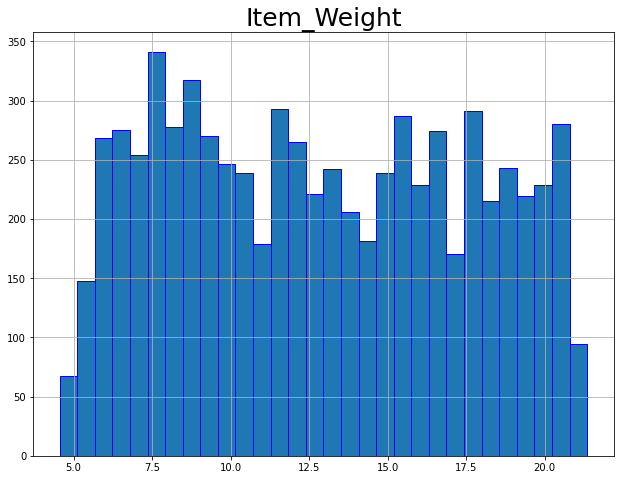

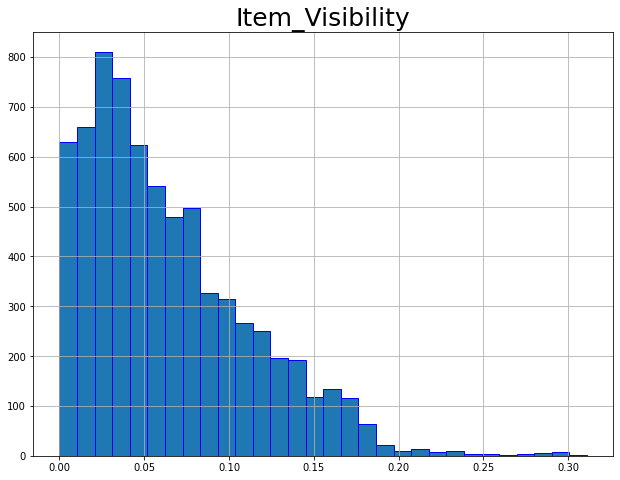

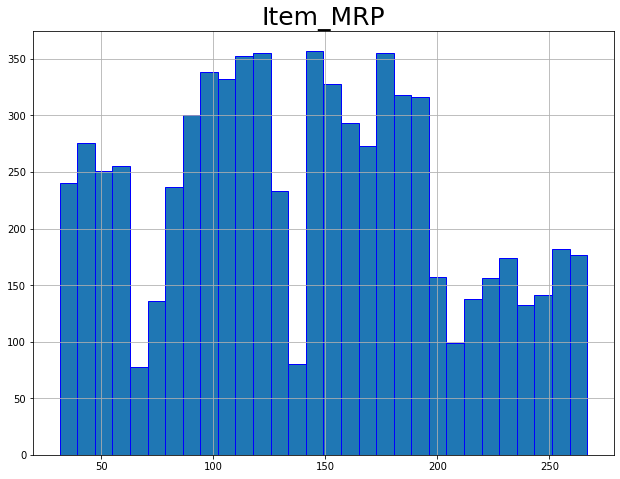

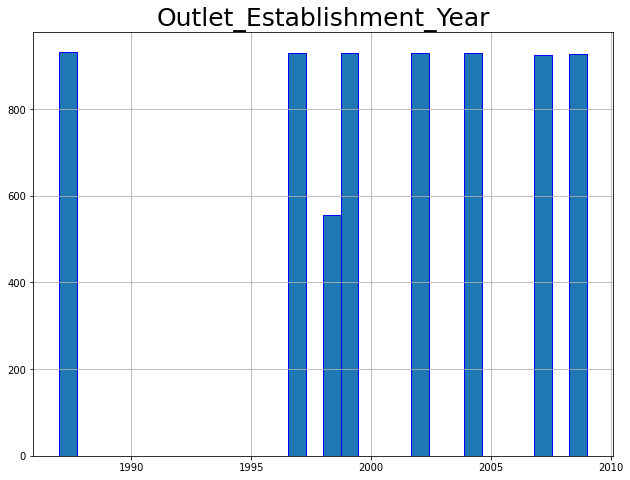

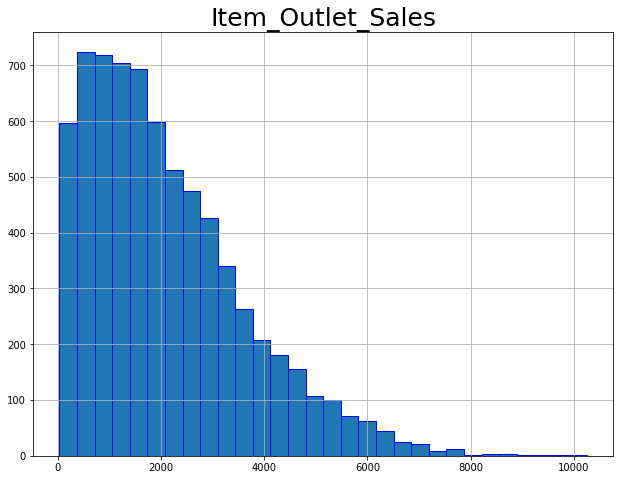

In [101]:
# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
for feature_name in numerical_features:
    desc_num_feature(df_sales, feature_name)

**Correlación**: Explica para efectos de análisis estrategico cual de las variables influencia con su corelación directa o inversa los resultados esperados, que para objeto de este análisis se prioriza las ventas. Así se puede ver que hay 2 variables tiene relación media y directa (r=0.62). El nivel de ventas (Item_Outlet_Sales) varia en la medida que se gestione adecuadamente Precio máximo de venta al público (precio de catálogo) del producto (Item_MRP). 

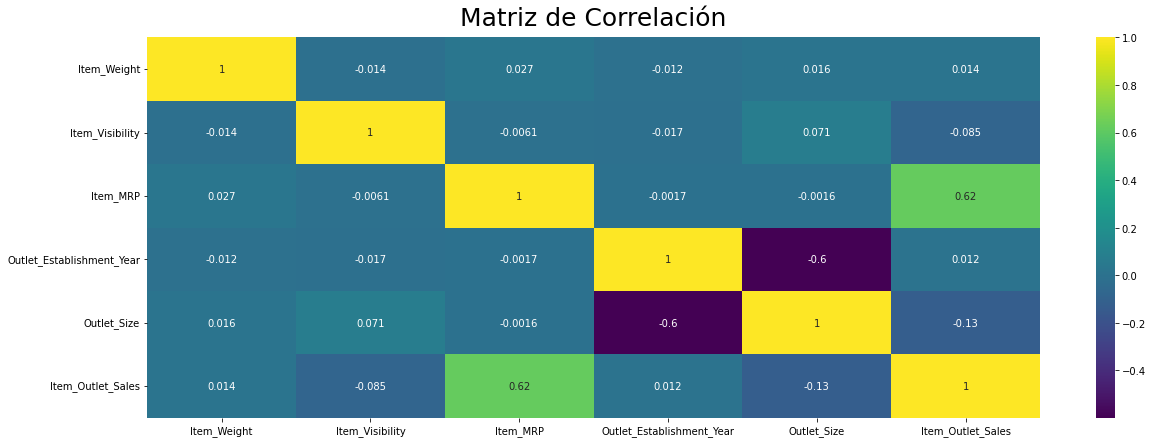

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df_sales.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()
